POLITICAL BIAS

In [ ]:
from google.colab import drive
import pandas as pd
from IPython.display import display
from tqdm import tqdm

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
csv_file_path = '/content/drive/MyDrive/Colab Notebooks/data/processed/random_selected_articles_summaries_gpt_ner.csv'

In [ ]:
df = pd.read_csv(csv_file_path)

In [ ]:
display(df.head())

,title,cleaned_article,summary,selected_entities,ner_summary
0,Poland abortion: Polish women look for help in...,Poland abortion Polish women look for help in ...,Poland’s recent near-total abortion ban has dr...,"['Poland', 'Polish', 'Germany', 'Euro', 'Engli...",Poland’s near-total abortion ban has led to an...
1,Hong Kong Cardinal advocates for promoting a c...,Hong Kong Cardinal advocates for promoting a c...,"In his message for Pro-Life Day 2020, Cardinal...","['Hong Kong', 'Vatican News', 'Vatican Church'...","Cardinal John Tong, Apostolic Administrator of..."
2,Sex Education in the Philippines - The Borgen ...,Sex Education in the Philippines - The Borgen ...,Sex education in the Philippines is aimed at e...,"['Philippines', 'Borgen', 'Project', 'Board of...",The article discusses the state of sex educati...
3,"When a fetal scan showed problems, she fled Id...","When a fetal scan showed problems, she fled Id...","Jillaine St. Michel, a 37-year-old Idaho resid...","['Idaho', 'The Guardian', '##ralia', 'Guardian...","Jillaine St. Michel, a 37-year-old woman from ..."
4,Prioritizing the Neglected Areas of SRHR in Ca...,Prioritizing the Neglected Areas of SRHR in Ca...,The policy brief from Action Canada for Sexual...,"['Canada', 'Action Canada', 'Sexual', 'Health ...","In the context of the global COVID-19 crisis, ..."


In [ ]:
# Use a pipeline as a high-level helper
from transformers import pipeline

pipe = pipeline("text-classification", model="bucketresearch/politicalBiasBERT")

config.json:   0%|          | 0.00/909 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/433M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/669k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


In [ ]:
# Load model directly
import torch
from transformers import AutoModelForSequenceClassification, AutoTokenizer
import pandas as pd
from transformers import AutoTokenizer, AutoModelForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained("bucketresearch/politicalBiasBERT")
model = AutoModelForSequenceClassification.from_pretrained("bucketresearch/politicalBiasBERT")
model.eval()

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(28996, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

In [ ]:
def score_article(article):
    # Tokenize the input article
    inputs = tokenizer(article, return_tensors="pt", padding=True, truncation=True, max_length=512)

    # Get model predictions
    with torch.no_grad():
        outputs = model(**inputs)

    # Apply softmax to get probabilities
    probs = torch.softmax(outputs.logits, dim=1)

    # Get predicted class and probability
    predicted_class = torch.argmax(probs, dim=1).item()
    class_probabilities = probs.squeeze().tolist()

    return predicted_class, class_probabilities


In [ ]:
# Append results to the list
      # [0] -> left
      # [1] -> center
      # [2] -> right
# Initialize a list to store results
results = []
# Iterate over the first 10 articles in the DataFrame
for _, article in tqdm(df.iterrows()):  # Using iterrows() to access each row
    # Score the cleaned article
    article_predicted_class, article_class_probabilities = score_article(article['cleaned_article'])

    # Score the summary
    summary_predicted_class, summary_class_probabilities = score_article(article['ner_summary'])

    # Append results to the list
    results.append({
        "Article Title": article['title'],  # Assuming you want to use the article's title
        "Article Predicted Class": article_predicted_class,
        "Article Class Probabilities": article_class_probabilities,
        "GPT Predicted Class": summary_predicted_class,
        "GPT Class Probabilities": summary_class_probabilities
    })

# Convert the results to a DataFrame
df = pd.DataFrame(results)

# Display the results in tabular format
display(df)


293it [02:37,  1.86it/s]


,Article Title,Article Predicted Class,Article Class Probabilities,GPT Predicted Class,GPT Class Probabilities
0,Poland abortion: Polish women look for help in...,0,"[0.9828202724456787, 0.01291339099407196, 0.00...",1,"[0.14165040850639343, 0.7955129742622375, 0.06..."
1,Hong Kong Cardinal advocates for promoting a c...,0,"[0.5691644549369812, 0.1989683210849762, 0.231...",2,"[0.13856801390647888, 0.06512399017810822, 0.7..."
2,Sex Education in the Philippines - The Borgen ...,0,"[0.47437047958374023, 0.30024129152297974, 0.2...",0,"[0.9965085387229919, 0.0017170535866171122, 0...."
3,"When a fetal scan showed problems, she fled Id...",2,"[0.3486248254776001, 0.1994600147008896, 0.451...",0,"[0.48112568259239197, 0.33052074909210205, 0.1..."
4,Prioritizing the Neglected Areas of SRHR in Ca...,0,"[0.6540042161941528, 0.2896295189857483, 0.056...",0,"[0.5992997288703918, 0.302742063999176, 0.0979..."
...,...,...,...,...,...
288,Pueblo Council decision on anti-abortion ordin...,2,"[0.3037260174751282, 0.1310121715068817, 0.565...",2,"[0.20185549557209015, 0.12679703533649445, 0.6..."
289,Louisiana House guts abortion bill that could ...,2,"[0.1488608419895172, 0.05272804573178291, 0.79...",2,"[0.08439741283655167, 0.0820852667093277, 0.83..."
290,Onslaught of new abortion restrictions looms i...,0,"[0.6407644152641296, 0.2240273356437683, 0.135...",0,"[0.9965192079544067, 0.001857561757788062, 0.0..."
291,Indiana abortion clinics stop providing aborti...,1,"[0.09374891966581345, 0.8912057876586914, 0.01...",2,"[0.27727800607681274, 0.3605305254459381, 0.36..."


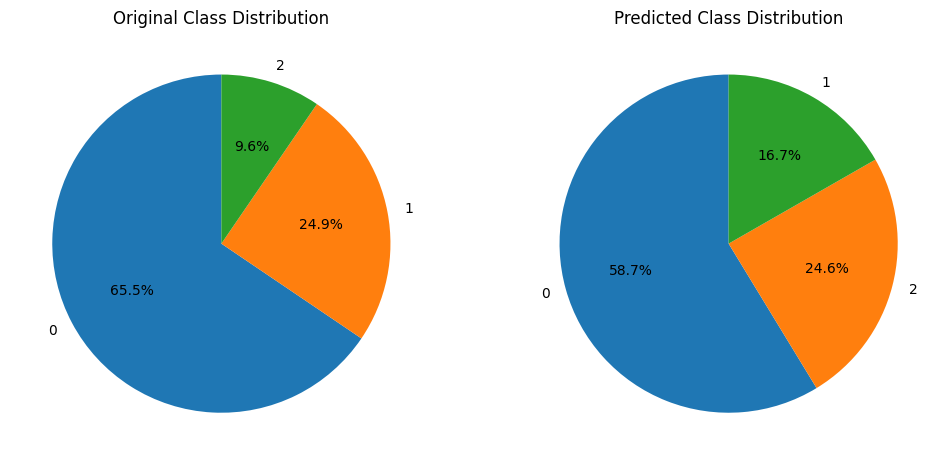

In [ ]:
# prompt: Using dataframe df: pie chart to show original class count and then predicted class count using mat plot lib

import matplotlib.pyplot as plt

# Count original class occurrences
original_class_counts = df['Article Predicted Class'].value_counts()

# Count predicted class occurrences
predicted_class_counts = df['GPT Predicted Class'].value_counts()

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Original class pie chart
axes[0].pie(original_class_counts, labels=original_class_counts.index, autopct='%1.1f%%', startangle=90)
axes[0].set_title('Original Class Distribution')

# Predicted class pie chart
axes[1].pie(predicted_class_counts, labels=predicted_class_counts.index, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Predicted Class Distribution')

# Display the plot
plt.show()


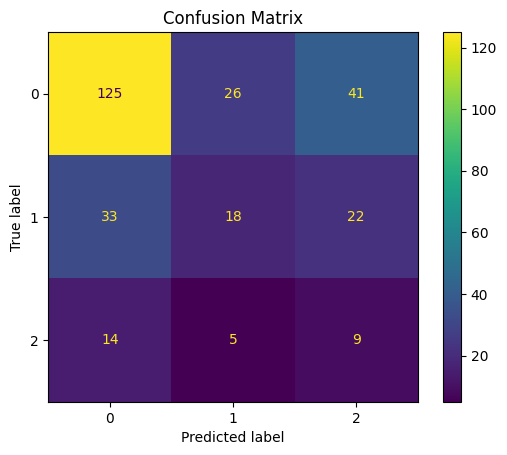

KeyError: 'Class Shift'

In [ ]:
# prompt: Using dataframe df: give me confuson matrix and how many values changed in a plotr

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Create the confusion matrix
cm = confusion_matrix(df['Article Predicted Class'], df['GPT Predicted Class'])

# Display the confusion matrix using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1, 2]) # Assuming your classes are 0, 1 and 2
disp.plot()
plt.title('Confusion Matrix')
plt.show()

# Count the number of values that changed
changed_count = df['Class Shift'].sum()

print(f"Number of values changed: {changed_count}")

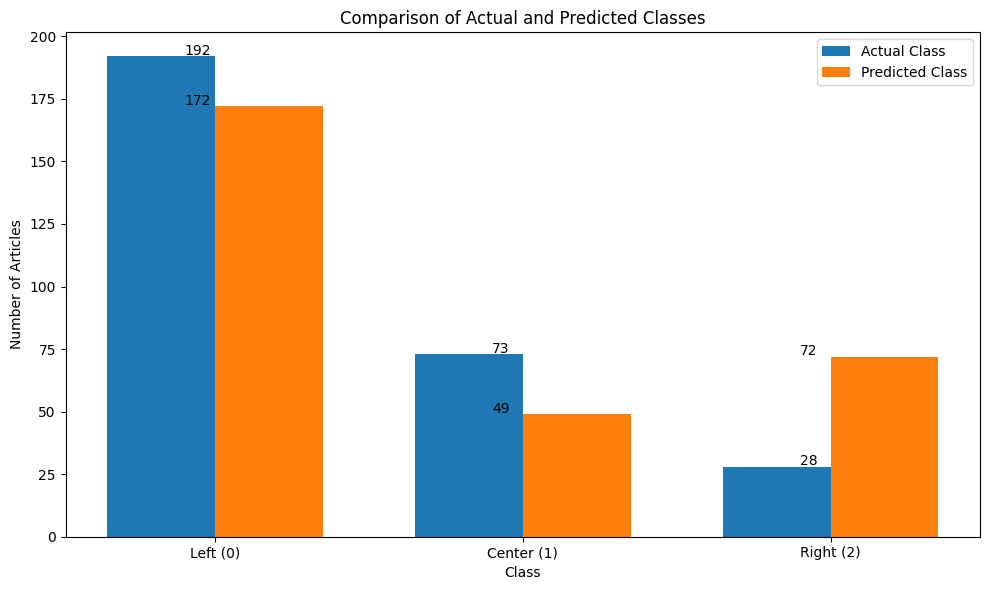

In [ ]:
# prompt: Using dataframe df: generate bar chart with comparison between actual and predicted classes using separate bars use labels for 0 as left, 1 as center and 2 as right

import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame

# Group data by actual and predicted classes
actual_counts = df.groupby('Article Predicted Class').size().reset_index(name='Actual Count')
predicted_counts = df.groupby('GPT Predicted Class').size().reset_index(name='Predicted Count')


# Create a bar chart
width = 0.35  # width of bars

fig, ax = plt.subplots(figsize=(10, 6))
actual_bars = ax.bar(actual_counts['Article Predicted Class'] - width/2, actual_counts['Actual Count'], width, label='Actual Class')
predicted_bars = ax.bar(predicted_counts['GPT Predicted Class'] + width/2, predicted_counts['Predicted Count'], width, label='Predicted Class')

# Customize the plot
ax.set_xlabel('Class')
ax.set_ylabel('Number of Articles')
ax.set_title('Comparison of Actual and Predicted Classes')
ax.set_xticks([0, 1, 2])
ax.set_xticklabels(['Left (0)', 'Center (1)', 'Right (2)'])  # Set custom labels
ax.legend()

# Add labels to the top of each bar
def addlabels(x,y,z):
    for i in range(len(x)):
        plt.text(i-0.1,y[i]+0.5,z[i])


addlabels(actual_counts['Article Predicted Class'], actual_counts['Actual Count'], actual_counts['Actual Count'].astype(int))
addlabels(predicted_counts['GPT Predicted Class'], predicted_counts['Predicted Count'], predicted_counts['Predicted Count'].astype(int))
plt.tight_layout()
plt.show()

In [ ]:
# prompt: Using dataframe df: combined pi chart for both and add a legend which says 0 is left, 1 is center and 2 is right

import pandas as pd
import matplotlib.pyplot as plt

# Calculate the value counts for each predicted class
article_class_counts = df['Article Predicted Class'].value_counts()
gpt_class_counts = df['GPT Predicted Class'].value_counts()

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Article Predicted Class Pie Chart
axes[0].pie(article_class_counts, labels=article_class_counts.index, autopct='%1.1f%%', startangle=90)
axes[0].set_title('Article Predicted Class Distribution')

# GPT Predicted Class Pie Chart
axes[1].pie(gpt_class_counts, labels=gpt_class_counts.index, autopct='%1.1f%%', startangle=90)
axes[1].set_title('GPT Predicted Class Distribution')

# Add a common legend
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, ['Left (0)', 'Center (1)', 'Right (2)'], loc='center right')


plt.show()


In [ ]:
# prompt: Using dataframe df: confusion matrix

import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'Article Predicted Class' is the true label and 'GPT Predicted Class' is the prediction
y_true = df['Article Predicted Class']
y_pred = df['GPT Predicted Class']


cm = confusion_matrix(y_true, y_pred)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1', 'Predicted 2'],
            yticklabels=['True 0', 'True 1', 'True 2'])
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.title("Confusion Matrix")
plt.show()
